<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-and-Load-Data" data-toc-modified-id="Import-and-Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import and Load Data</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Trying-Out-Models" data-toc-modified-id="Trying-Out-Models-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Trying Out Models</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Support-Vector-Machine" data-toc-modified-id="Support-Vector-Machine-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Support Vector Machine</a></span></li><li><span><a href="#Decision-Trees-(Random-Forest,-Gradient-Boosting,-XGBoost)" data-toc-modified-id="Decision-Trees-(Random-Forest,-Gradient-Boosting,-XGBoost)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Decision Trees (Random Forest, Gradient Boosting, XGBoost)</a></span></li><li><span><a href="#Other-Models-(e.g.-Bagging-Classifier)" data-toc-modified-id="Other-Models-(e.g.-Bagging-Classifier)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Other Models (e.g. Bagging Classifier)</a></span></li></ul></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model Evaluation</a></span></li></ul></div>

## Import and Load Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
import numpy as np
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout, BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from sklearn.metrics import accuracy_score

In [3]:
#!pip install xgboost

In [4]:
df = pd.read_csv("reviews_0-250.csv", index_col = None)

/var/folders/zd/yvpsjw1553lghwz7d57ppfnc0000gn/T/ipykernel_11263/3045090334.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("reviews_0-250.csv", index_col = None)


In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
#df = pd.read_csv("/content/drive/MyDrive/reviews_0-250.csv", index_col=None)

In [7]:
df.shape

(1044434, 19)

In [8]:
df.isna().sum()

Unnamed: 0                       0
author_id                        0
rating                           0
is_recommended              164171
helpfulness                 548137
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                   1385
review_title                296276
skin_tone                   163338
eye_color                   203368
skin_type                   107926
hair_color                  217917
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044434 entries, 0 to 1044433
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1044434 non-null  int64  
 1   author_id                 1044434 non-null  object 
 2   rating                    1044434 non-null  int64  
 3   is_recommended            880263 non-null   float64
 4   helpfulness               496297 non-null   float64
 5   total_feedback_count      1044434 non-null  int64  
 6   total_neg_feedback_count  1044434 non-null  int64  
 7   total_pos_feedback_count  1044434 non-null  int64  
 8   submission_time           1044434 non-null  object 
 9   review_text               1043049 non-null  object 
 10  review_title              748158 non-null   object 
 11  skin_tone                 881096 non-null   object 
 12  eye_color                 841066 non-null   object 
 13  skin_type                 9

In [10]:
df.shape

(1044434, 19)

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'is_recommended'}>],
       [<Axes: title={'center': 'helpfulness'}>,
        <Axes: title={'center': 'total_feedback_count'}>,
        <Axes: title={'center': 'total_neg_feedback_count'}>],
       [<Axes: title={'center': 'total_pos_feedback_count'}>,
        <Axes: title={'center': 'price_usd'}>, <Axes: >]], dtype=object)

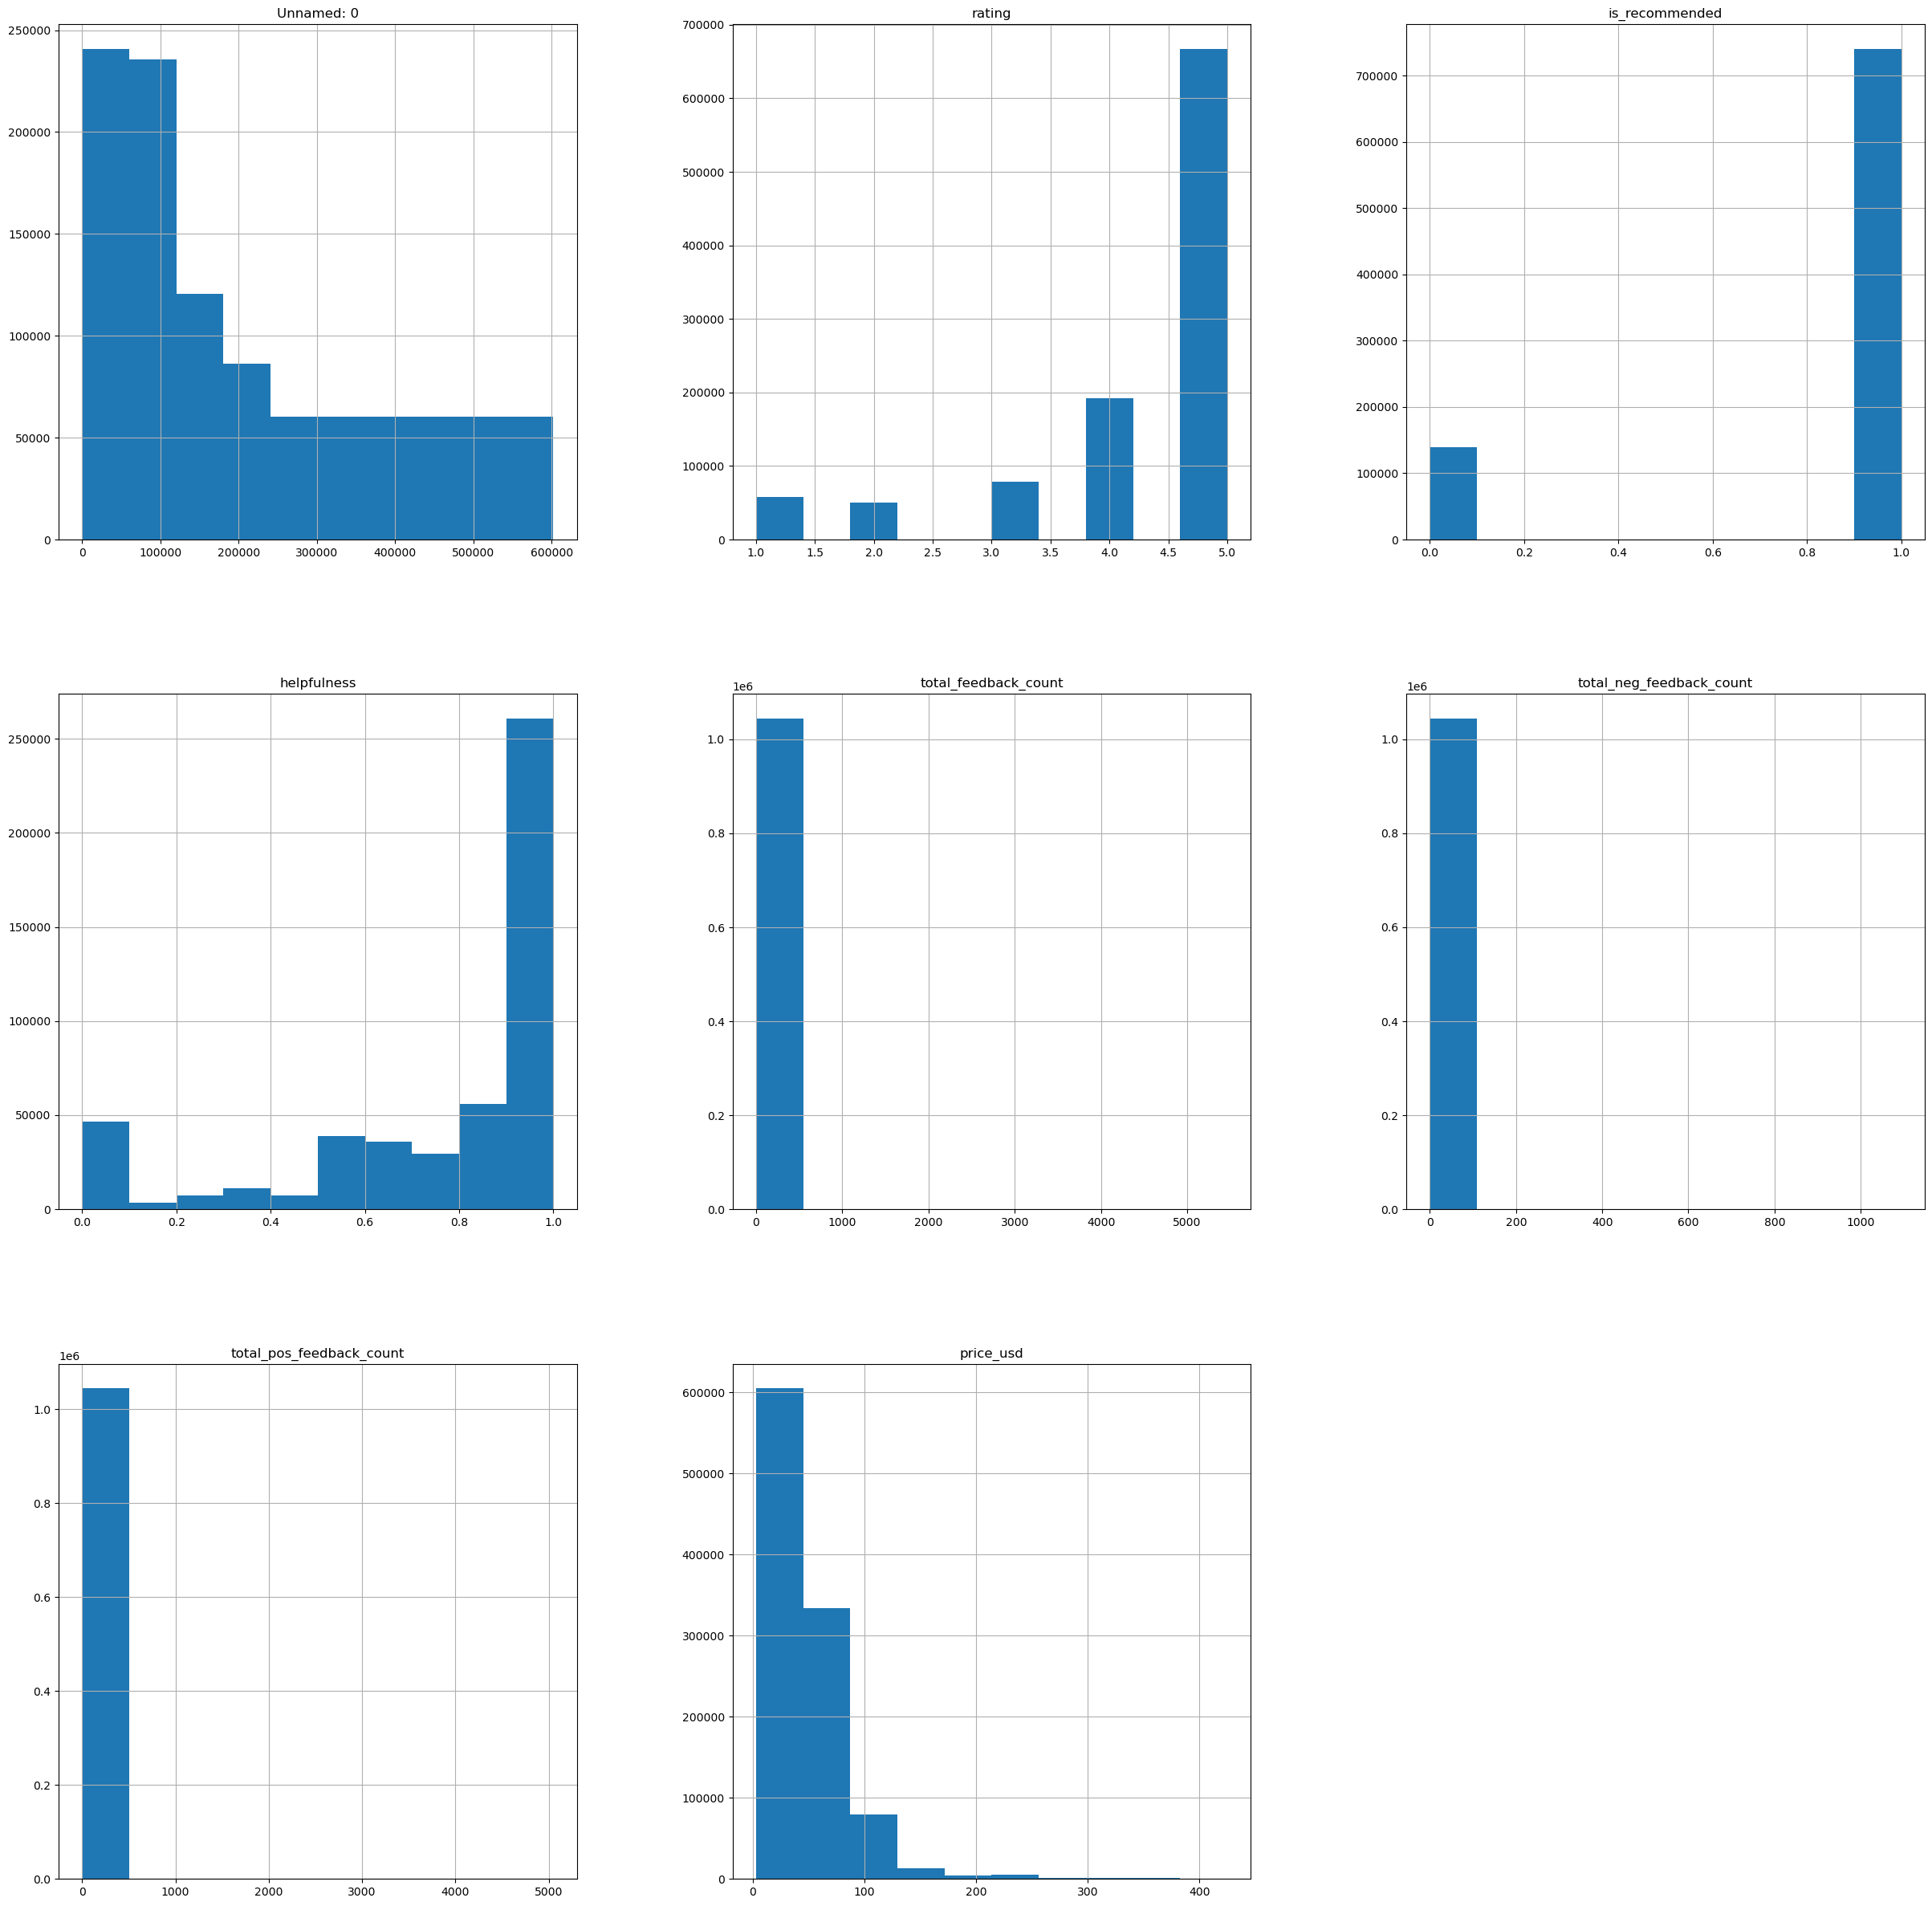

In [11]:
df.hist(figsize=[30,30])

In [12]:
df.describe()

,Unnamed: 0,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd
count,1.044434e+06,1.044434e+06,880263.000000,496297.000000,1.044434e+06,1.044434e+06,1.044434e+06,1.044434e+06
mean,2.073123e+05,4.303296e+00,0.841359,0.767792,3.979309e+00,8.450060e-01,3.134303e+00,4.815299e+01
std,1.748092e+05,1.143601e+00,0.365341,0.318644,2.276262e+01,5.062652e+00,1.979071e+01,3.761199e+01
min,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
25%,6.527700e+04,4.000000e+00,1.000000,0.652174,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+01
50%,1.433185e+05,5.000000e+00,1.000000,0.933333,0.000000e+00,0.000000e+00,0.000000e+00,3.900000e+01
75%,3.410208e+05,5.000000e+00,1.000000,1.000000,3.000000e+00,0.000000e+00,2.000000e+00,6.200000e+01
max,6.021290e+05,5.000000e+00,1.000000,1.000000,5.464000e+03,1.094000e+03,5.050000e+03,4.250000e+02


Checking is_recommended distribution with few other features to understand the target distribution.

<Axes: xlabel='rating', ylabel='is_recommended'>

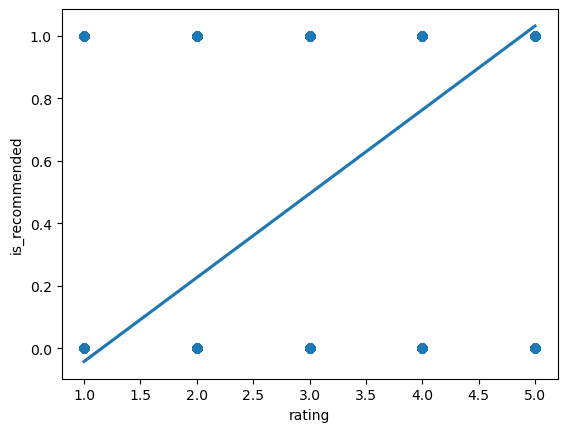

In [83]:
sns.regplot(y='is_recommended', data=df, x='rating')

<Axes: xlabel='helpfulness', ylabel='is_recommended'>

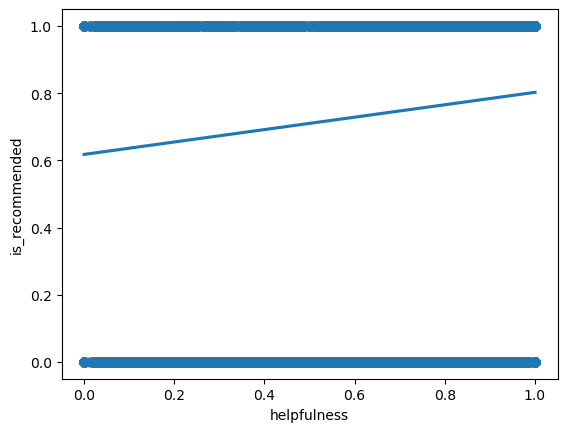

In [84]:
sns.regplot(y='is_recommended', data=df, x='helpfulness')

<Axes: xlabel='price_usd', ylabel='is_recommended'>

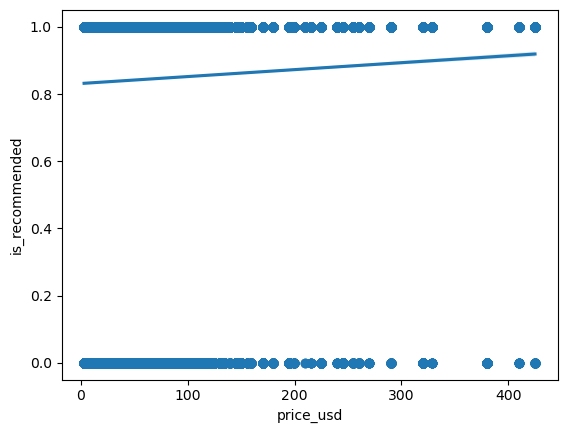

In [85]:
sns.regplot(y='is_recommended', data=df, x='price_usd')

<Axes: xlabel='total_feedback_count', ylabel='is_recommended'>

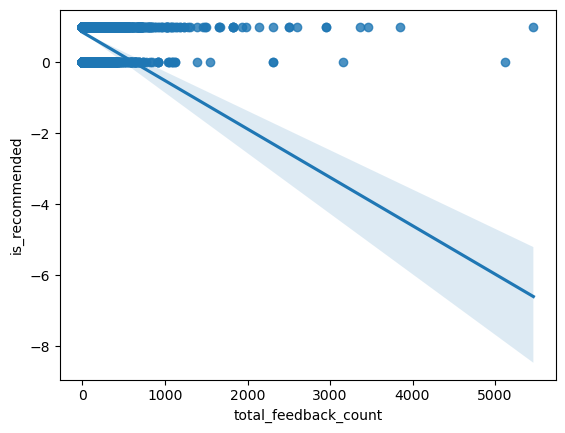

In [86]:
sns.regplot(y='is_recommended', data=df, x='total_feedback_count')

<Axes: xlabel='total_neg_feedback_count', ylabel='is_recommended'>

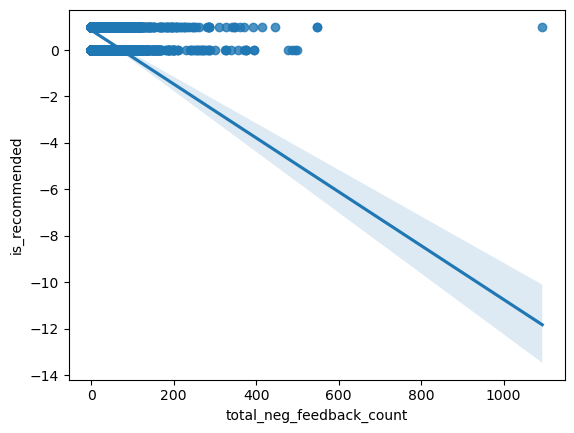

In [87]:
sns.regplot(y='is_recommended', data=df, x='total_neg_feedback_count')

<Axes: xlabel='total_pos_feedback_count', ylabel='is_recommended'>

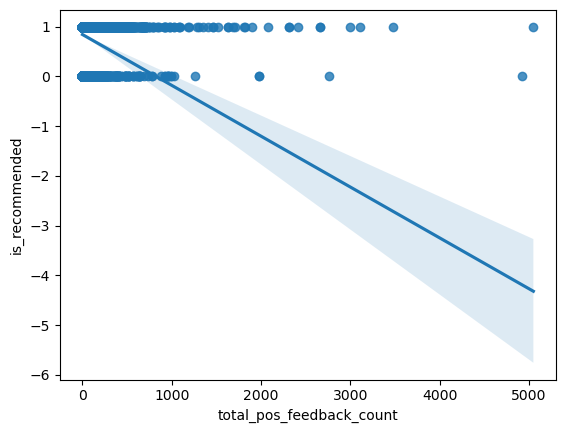

In [88]:
sns.regplot(y='is_recommended', data=df, x='total_pos_feedback_count')

## Preprocessing

 - Handle missing values
 - Droppping post customer review columns
 - Split the dataset into features (X) and target variable (y)
 - Split into training and testing sets

In [13]:
len(df.columns)

19

In [14]:
df.isna().sum()

Unnamed: 0                       0
author_id                        0
rating                           0
is_recommended              164171
helpfulness                 548137
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                   1385
review_title                296276
skin_tone                   163338
eye_color                   203368
skin_type                   107926
hair_color                  217917
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
dtype: int64

Dropping columns with 50% of missing values

In [15]:
threshold = len(df)* 0.5

In [16]:
df.dropna(thresh = threshold, axis = 1, inplace = True)

In [17]:
len(df.columns)

18

In [18]:
df.columns

Index(['Unnamed: 0', 'author_id', 'rating', 'is_recommended',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd'],
      dtype='object')

In [19]:
df.isna().sum()[df.isna().sum()!=0]

is_recommended    164171
review_text         1385
review_title      296276
skin_tone         163338
eye_color         203368
skin_type         107926
hair_color        217917
dtype: int64

In [20]:
#from google.colab import drive
#drive.mount('/content/drive')

In [21]:
df.dropna(subset=['is_recommended'], inplace=True)

In [22]:
df.shape

(880263, 18)

In [23]:
df.isna().sum()[df.isna().sum()!=0]

review_text       1385
review_title    276555
skin_tone        36999
eye_color        39869
skin_type        17828
hair_color       53746
dtype: int64

In [24]:
df.head()

,Unnamed: 0,author_id,rating,is_recommended,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,2,0,2,2/1/23,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,0,0,0,3/21/23,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,0,0,0,3/21/23,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,0,0,0,3/20/23,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,0,0,0,3/20/23,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


Droppping NaNs rows for following column, as these are important fatures for our classification model.

In [25]:
df.dropna(subset=['skin_type','review_text','review_title','skin_tone','eye_color','hair_color'], inplace=True)

In [26]:
df.shape

(554349, 18)

In [27]:
df.isna().sum()[df.isna().sum()!=0]

Series([], dtype: int64)

In [28]:
df.head()

,Unnamed: 0,author_id,rating,is_recommended,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
2,2,5061282401,5,1.0,0,0,0,3/21/23,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
5,5,42802569154,4,1.0,1,0,1,3/19/23,The scent isn’t my favourite but it works grea...,Great!,lightMedium,brown,normal,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
6,6,6941883808,2,0.0,8,6,2,3/19/23,I’ll give this 2 stars for nice packaging and ...,Dried my lips out and clogged my pores,light,blue,combination,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
7,7,27926227988,5,1.0,0,0,0,3/19/23,I use this at night or while I’m putting makeu...,Works great,fairLight,brown,combination,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
8,8,7656791726,5,1.0,1,0,1,3/18/23,I love this stuff. I first had the sample size...,Must have.,light,blue,normal,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [29]:
df.dropna(subset=['review_title'], inplace=True)

In [30]:
df.skin_tone.value_counts()

skin_tone
light          156102
fair           121972
lightMedium    119088
medium          43334
mediumTan       38021
fairLight       36065
tan             20484
deep            13267
rich             3653
porcelain        1047
olive             969
dark              304
notSureST          42
ebony               1
Name: count, dtype: int64

In [31]:
df.eye_color.value_counts()

eye_color
brown    290828
blue     108999
green     76468
hazel     75061
Grey       2729
gray        264
Name: count, dtype: int64

In [32]:
df.hair_color.value_counts()

hair_color
brown       262168
blonde      129334
black       115779
auburn       20419
red          16300
brunette      6691
gray          3658
Name: count, dtype: int64

Making product id column as numeric by removing "P" from all the IDs.

In [33]:
df['product_id'] = df['product_id'].str.replace('P', '').astype(int)

In [34]:
df.shape

(554349, 18)

Dropping columns on the basis of:
1. Not relevant to our classification statement.
2. Post purchase columns like - review title, review text and rating provided by the customer.

In [35]:
df.drop(columns=['Unnamed: 0','submission_time','product_name','rating','review_title','review_text'], inplace = True)

In [36]:
df.head()

,author_id,is_recommended,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,skin_tone,eye_color,skin_type,hair_color,product_id,brand_name,price_usd
2,5061282401,1.0,0,0,0,light,brown,dry,blonde,420652,LANEIGE,24.0
5,42802569154,1.0,1,0,1,lightMedium,brown,normal,brown,420652,LANEIGE,24.0
6,6941883808,0.0,8,6,2,light,blue,combination,brown,420652,LANEIGE,24.0
7,27926227988,1.0,0,0,0,fairLight,brown,combination,brown,420652,LANEIGE,24.0
8,7656791726,1.0,1,0,1,light,blue,normal,blonde,420652,LANEIGE,24.0


In [37]:
df.product_id.nunique()

1246

In [38]:
df.is_recommended.nunique()

2

In [39]:
df.shape

(554349, 12)

In [40]:
df.author_id.nunique()

301370

Somehow, authorID is a categorical column, we shall change its type to int and missing values.

In [41]:
df['author_id'] = pd.to_numeric(df['author_id'], errors='coerce') 

In [42]:
df.isna().sum()

author_id                   32
is_recommended               0
total_feedback_count         0
total_neg_feedback_count     0
total_pos_feedback_count     0
skin_tone                    0
eye_color                    0
skin_type                    0
hair_color                   0
product_id                   0
brand_name                   0
price_usd                    0
dtype: int64

In [43]:
df.dropna(subset=['author_id'], inplace=True)

In [44]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'bool', 'category']).columns

In [45]:
numerical_cols

Index(['author_id', 'is_recommended', 'total_feedback_count',
       'total_neg_feedback_count', 'total_pos_feedback_count', 'product_id',
       'price_usd'],
      dtype='object')

In [46]:
categorical_cols

Index(['skin_tone', 'eye_color', 'skin_type', 'hair_color', 'brand_name'], dtype='object')

In [47]:
df.head()

,author_id,is_recommended,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,skin_tone,eye_color,skin_type,hair_color,product_id,brand_name,price_usd
2,5.061282e+09,1.0,0,0,0,light,brown,dry,blonde,420652,LANEIGE,24.0
5,4.280257e+10,1.0,1,0,1,lightMedium,brown,normal,brown,420652,LANEIGE,24.0
6,6.941884e+09,0.0,8,6,2,light,blue,combination,brown,420652,LANEIGE,24.0
7,2.792623e+10,1.0,0,0,0,fairLight,brown,combination,brown,420652,LANEIGE,24.0
8,7.656792e+09,1.0,1,0,1,light,blue,normal,blonde,420652,LANEIGE,24.0


In [48]:
df.shape

(554317, 12)

In [49]:
df['author_id'] = pd.to_numeric(df['author_id'], errors='coerce')

In [50]:
df.dropna(subset=['author_id'], inplace=True)

In [51]:
df.head()

,author_id,is_recommended,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,skin_tone,eye_color,skin_type,hair_color,product_id,brand_name,price_usd
2,5.061282e+09,1.0,0,0,0,light,brown,dry,blonde,420652,LANEIGE,24.0
5,4.280257e+10,1.0,1,0,1,lightMedium,brown,normal,brown,420652,LANEIGE,24.0
6,6.941884e+09,0.0,8,6,2,light,blue,combination,brown,420652,LANEIGE,24.0
7,2.792623e+10,1.0,0,0,0,fairLight,brown,combination,brown,420652,LANEIGE,24.0
8,7.656792e+09,1.0,1,0,1,light,blue,normal,blonde,420652,LANEIGE,24.0


In [52]:
X = df.drop(columns = ['is_recommended'], axis = 1)

In [53]:
y = df['is_recommended']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool', 'category']).columns

In [56]:
numerical_cols

Index(['author_id', 'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'product_id', 'price_usd'],
      dtype='object')

In [57]:
categorical_cols

Index(['skin_tone', 'eye_color', 'skin_type', 'hair_color', 'brand_name'], dtype='object')

## Feature Selection Strategies

**Setting up ColumnTransformer**

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numerical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='mean')),  # Imputing with the mean
    ('scaler', StandardScaler())  # Scaling the data
])

categorical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy="constant", fill_value="unknown")), 
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encoding
])

In [59]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'  # Leave remaining columns untouched
)

In [60]:
X_processed = preprocessor.fit_transform(X)

In [61]:
X_processed.shape

(554317, 160)

## Dimensionality Reduction

In [62]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_processed)

In [63]:
pca.n_components_

40

In [64]:
pca.explained_variance_ratio_.sum()

0.9504522677984875

In [65]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (40, 160)


In [66]:
print("PCA components:\n{}".format(pca.components_)) 

PCA components:
[[-3.07055943e-02  6.26951594e-01  4.97784748e-01 ...  1.06840953e-04
  -7.82884424e-05 -2.35367310e-04]
 [ 5.68294499e-01  5.16445854e-03  1.19940855e-02 ...  1.21220896e-03
   3.44162029e-03  1.02794634e-03]
 [-4.79762043e-01 -9.29897580e-03 -1.30191430e-02 ... -2.90940533e-04
  -9.07779327e-04  3.53418404e-04]
 ...
 [ 2.10007287e-03 -5.26358670e-04  4.90245598e-05 ...  2.42267488e-03
   5.60207436e-03  5.33703398e-03]
 [ 4.00743281e-03  3.27134384e-04 -4.95437528e-04 ...  6.09298252e-05
   8.58954862e-04 -4.78202850e-04]
 [-2.88317671e-03  8.61279802e-04  1.07244541e-03 ...  2.82002796e-03
   6.34150474e-03  6.49869232e-03]]


In [67]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
varianceratio = pca.explained_variance_ratio_
d = np.argmax(cumsum >= 0.95) + 1       #+1 for rounding purpose and indexing issues

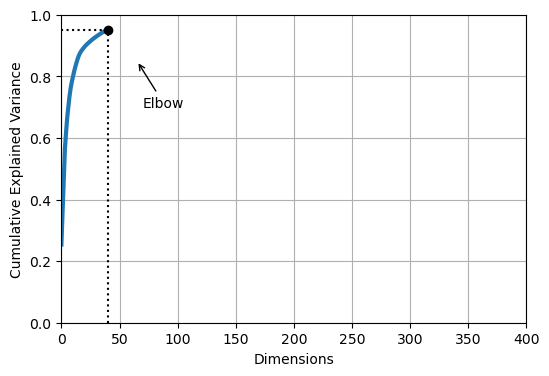

In [68]:
# HOML, Figure 8–8
plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Cumulative Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"))
plt.grid(True)
plt.show()
#diminishing return of the features

#down to 100 wouldn't loose much variance explained.

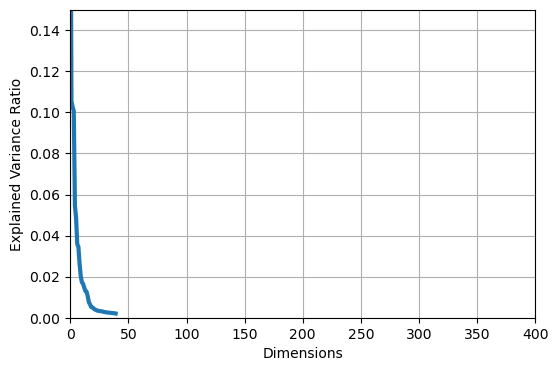

In [69]:
plt.figure(figsize=(6, 4))
plt.plot(varianceratio, linewidth=3)
plt.axis([0, 400, 0, 0.15])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()
#non-cumulative sum version of the above graph

This shall help with the processing as features are transformed from 160 to 40.

### Dimensionality Reduction and checking Logistic Regression
Checking score with Logistic Regression if we are getting appropriate score.

In [70]:
from sklearn.feature_selection import SelectFromModel

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95)),
    ('log_reg', LogisticRegression(max_iter=10000))
])

In [71]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  Index(['author_id', 'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'product_id', 'price_usd'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['skin_tone', 'eye_color', 'skin_type', 'hair_color', 'brand_name'], dtype='object'))])),
                ('pca', PCA(n_components=0.95)),
                ('log_reg', LogisticRegression(max_iter=10000))])

In [72]:
# Predicted classes
y_pred = model_pipeline.predict(X_test)

# Predicted probabilities for ROC AUC score
# Assuming a binary classification, probabilities for the positive class
y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]


In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Basic classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Adjust 'binary' as needed
recall = recall_score(y_test, y_pred, average='binary')  # Adjust 'binary' as needed
f1 = f1_score(y_test, y_pred, average='binary')  # Adjust 'binary' as needed

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.8420316784528792
Precision: 0.8442186655428618
Recall: 0.9945066804809083
F1 Score: 0.9132207857847193
ROC AUC Score: 0.680972004680299
Confusion Matrix:
[[ 1202 17004]
 [  509 92149]]


### Checking Feature Selection & Feature Importance

In [74]:
preprocessor_tree = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'  # Leave remaining columns untouched
)

In [75]:
from sklearn.feature_selection import SelectFromModel
rnd_clf1 = RandomForestClassifier(n_estimators=500, n_jobs = -1, random_state = 42)

# Create a pipeline with preprocessing, feature selection, and the decision tree classifier
tree_pipeline1 = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('feature_selection', SelectFromModel(rnd_clf1)),
    ('random_forest', rnd_clf1)
])

In [76]:
tree_pipeline1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['skin_tone', 'eye_color', 'skin_type', 'hair_color', 'brand_name'], dtype='object'))])),
                ('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(n_estimators=500,
                                                                  n_jobs=-1,
                                                                  random_state=42))),
                ('random_forest',
                 RandomForestClassifier(n_estimators=500, n_jobs=-1,
                                        random_state=42))])

In [77]:
y_proba = tree_pipeline1.predict_proba(X_test)[:, 1]  # Assuming the positive class is at index 1

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)

print(f'ROC AUC score for random forest: {roc_auc}')

ROC AUC score for random forest: 0.7320890930424404


In [78]:
y_pred_rf = tree_pipeline1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy Score for random forest: {accuracy}")

Accuracy Score for random forest: 0.8428074036657527


In [79]:
# Assuming tree_pipeline1 has already been fitted with tree_pipeline1.fit(X_train, y_train)

# Access the fitted RandomForestClassifier used for feature selection
fitted_random_forest = tree_pipeline1.named_steps['feature_selection'].estimator_

# Get feature importances
feature_importances = fitted_random_forest.feature_importances_

# If you want to display the feature names along with their importances:
feature_importance_dict = dict(zip(X_train.columns, feature_importances))
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

print("Feature importances:")
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")


Feature importances:
eye_color: 0.01702710493904244
skin_type: 0.014703640353839986
total_pos_feedback_count: 0.014240565026220972
product_id: 0.008689606583549602
hair_color: 0.008328800227520645
skin_tone: 0.008322963017183547
total_feedback_count: 0.004052634767170529
price_usd: 0.0005016259794496353
author_id: 0.00018106572942317315
brand_name: 2.623555110652645e-05
total_neg_feedback_count: 8.878414671642012e-06


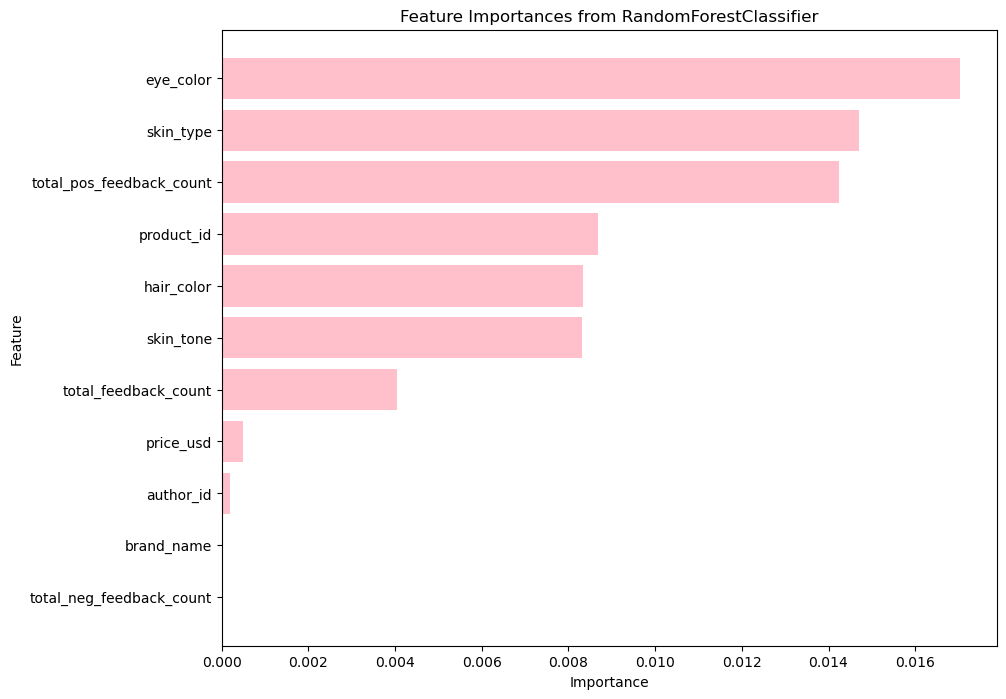

In [89]:
import matplotlib.pyplot as plt

# Assuming tree_pipeline1 has been fitted and feature_importances have been extracted as shown

# Sorting the feature importances in descending order for better visualization
features = [feature for feature, importance in sorted_feature_importances]
importances = [importance for feature, importance in sorted_feature_importances]

# Creating the bar chart
plt.figure(figsize=(10, 8))
plt.barh(features, importances, color='pink')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from RandomForestClassifier')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


**Obervation-**
In our predictive modeling for determining whether a skincare product is likely to be recommended, an analysis of feature importances has yielded valuable insights. 
- The model indicates that 'eye_color', 'skin_type', and 'total_pos_feedback_count' are the most influential features, with importance scores of approximately 0.017, 0.015, and 0.014 respectively. This suggests that personal attributes such as **eye color and skin type, as well as the volume of positive feedback**, are significant predictors for whether a product is recommended by users.

- While **'product_id' and 'hair_color'** also show a notable influence, their scores around 0.008 are less than half of that for 'eye_color', indicating a secondary level of impact. 'Skin_tone' shares a similar importance score, further emphasizing the role of individual customer characteristics in product recommendation.

- On the lower end of the spectrum, **'total_feedback_count' and 'price_usd'** carry some weight, but their scores are substantially lower, hinting that while overall feedback and price play a role, they are less decisive in the recommendation outcome.

## Trying Out Models - GridSeachCV

### Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model with the specified parameters
logistic_regression_l1 = LogisticRegression(
    penalty='l1',
    tol=0.0005,
    C=0.1,
    solver='saga',
    max_iter=10000,
    random_state=100
)

# Create a pipeline with preprocessing and the logistic regression model
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95)),
    ('classifier', logistic_regression_l1)
])

In [91]:
lasso_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  Index(['author_id', 'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'product_id', 'price_usd'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['skin_tone', 'eye_color', 'skin_type', 'hair_color', 'brand_name'], dtype='object'))])),
                ('pca', PCA(n_components=0.95)),
                ('classifier',
                 LogisticRegression(C=0.1, max_iter=10000, penalty='l1',
                                    random_state=100, solver='saga',
                                    tol=0.0005))])

In [92]:
y_prob = lasso_pipeline.predict_proba(X_test)[:, 1]

In [93]:
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score}")

AUC Score: 0.6812813723014206


**Logistic Regression with GridSearchCV**

In [94]:
logistic_regression_model = LogisticRegression(max_iter=10000, random_state=42, solver='saga', penalty='elasticnet')

# Updated pipeline with Elastic Net logistic regression
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca',PCA(n_components=0.95)),
    ('log_reg', logistic_regression_model)
])

In [95]:
param_grid_log = {
    'log_reg__C': [0.1, 1, 10],
    'log_reg__l1_ratio': [0,0.5,1]
}

In [96]:
grid_search_log = GridSearchCV(log_reg_pipeline, param_grid_log, cv=5, scoring='roc_auc', n_jobs=-1)

# Assuming X_train, y_train are your training data and labels
grid_search_log.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['author_id', 'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'product_id', 'price_usd'],
      dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['skin_tone', 'eye_color', 'skin_type', 'hair_color', 'brand_name'], dtype='object'))])),
                                       ('pca', PCA(n_components=0.95)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=10000,
                                                           penalty='elasticnet',
                                                           random_state=42,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'log_reg__C': [0.1, 1, 10],
                         'log_reg__l1_ratio': [0, 0.5, 1]},
             scoring='roc_auc')

In [97]:
print("Best parameters for logistic regression:", grid_search_log.best_params_)
print("Best ROC AUC score for logistic regression:", grid_search_log.best_score_)

Best parameters for logistic regression: {'log_reg__C': 0.1, 'log_reg__l1_ratio': 1}
Best ROC AUC score for logistic regression: 0.6831104566862355


### Ensembles (Random Forest, Gradient Boosting, XGBoost)

Classification using Random forest classifier without feature selection and dimensionality reduction, as random forest is good at handling high-dimensional data and do not need scaling.

**GridsearchCV - Random Forest**

In [111]:
rnd_clf1 = RandomForestClassifier(n_jobs = -1, random_state = 42)

# Create a pipeline with preprocessing, feature selection, and the decision tree classifier
tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('random_forest', rnd_clf1)
])

In [112]:
param_grid = {
    'random_forest__n_estimators': [250,350,400],  # Slightly reduced and more focused range
    'random_forest__max_depth': [15, 20, 25],  # Lower and narrower range to encourage simpler models
    'random_forest__min_samples_split': [2, 4],  # Added to control tree depth
    'random_forest__min_samples_leaf': [1, 2],  # Added to prevent overly complex models
}

# Set up the GridSearchCV object
grid_search_RF = GridSearchCV(tree_pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

In [146]:
grid_search_RF.fit(X_train, y_train) 

/Users/ritikaverma/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['skin_tone', 'eye_color', 'skin_type', 'hair_color', 'brand_name'], dtype='object'))])),
                                       ('random_forest',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'random_forest__max_depth': [15, 20, 25],
                         'random_forest__min_samples_leaf': [1, 2],
                         'random_forest__min_samples_split': [2, 4],
                         'random_forest__n_estimators': [250, 350, 400]},
             scoring='roc_auc')

In [147]:
y_proba_grid_RF = grid_search_RF.predict_proba(X_test)[:, 1]  # Assuming the positive class is at index 1

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba_grid_RF)

print(f'ROC AUC score for random forest: {roc_auc}')

ROC AUC score for random forest: 0.7678073153208942


In [148]:
print("Best parameters found: ", grid_search_RF.best_params_)

# Best estimator
best_estimator = grid_search_RF.best_estimator_

Best parameters found:  {'random_forest__max_depth': 25, 'random_forest__min_samples_leaf': 1, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 400}


**GridSeacrhCV - Gradient Boosting**

In [116]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(n_iter_no_change=5,tol=0.01, random_state=42)

tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('gradient_boosting', gbrt)
])

In [117]:
param_grid_GB = {
    'gradient_boosting__max_depth': [1,2,3],  # Exploring depths around the initial value
    'gradient_boosting__n_estimators': [300,400,500], 
    'gradient_boosting__learning_rate': [0.1, 0.5 ,1],  
}

In [118]:
from sklearn.model_selection import GridSearchCV

# Setup GridSearchCV
grid_search_GB = GridSearchCV(tree_pipeline, param_grid_GB, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)

# Assuming X_train, y_train are your training data and labels
grid_search_GB.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['skin_tone', 'eye_color', 'skin_type', 'hair_color', 'brand_name'], dtype='object'))])),
                                       ('gradient_boosting',
                                        GradientBoostingClassifier(n_iter_no_change=5,
                                                                   random_state=42,
                                                                   tol=0.01))]),
             n_jobs=-1,
             param_grid={'gradient_boosting__learning_rate': [0.1, 0.5, 1],
                         'gradient_boosting__max_depth': [1, 2, 3],
                         'gradient_boosting__n_estimators': [300, 400, 500]},
             scoring='roc_auc', verbose=1)

In [119]:
print("Best parameter for gradient boosting:", grid_search_GB.best_params_)
print("Best score gradient boosting:", grid_search_GB.best_score_)

Best parameter for gradient boosting: {'gradient_boosting__learning_rate': 0.5, 'gradient_boosting__max_depth': 3, 'gradient_boosting__n_estimators': 300}
Best score gradient boosting: 0.7430566842846698


**XGBoost - GridSearchCV**

In [120]:
xgb_clf = XGBClassifier(random_state=42)

# Create a pipeline
XGBoost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('xgb_classifier', xgb_clf)
])

In [121]:
param_grid_xgb = {
    'xgb_classifier__learning_rate': [0.01,0.05],
    'xgb_classifier__n_estimators': [300,500],
    'xgb_classifier__max_depth': [3, 6],
    'xgb_classifier__subsample': [0.7, 0.8],
    'xgb_classifier__gamma': [0, 0.1],
}

grid_search_xgb = GridSearchCV(XGBoost_pipeline, param_grid_xgb, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)

In [122]:
grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['skin_tone', 'eye_color', 'skin_type', 'hair_color', 'brand_name'], dtype='object'))])),
                                       ('xgb_classifier',
                                        XGBClassifier(base_score=None,
                                                      b...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'xgb_classifier__gamma': [0, 0.1],
                         'xgb_classifier__learning_rate': [0.01, 0.05],
                         'xgb_classifier__max_depth': [3, 6],
                         'xgb_classifier__n_estimators': [300, 500],
                         'xgb_classifier__subsample': [0.7, 0.8]},
             scoring='roc_auc', verbose=1)

In [123]:
print("Best parameters using XGBoost:", grid_search_xgb.best_params_)
print("Best score XGBoost:", grid_search_xgb.best_score_)

Best parameters using XGBoost: {'xgb_classifier__gamma': 0, 'xgb_classifier__learning_rate': 0.05, 'xgb_classifier__max_depth': 6, 'xgb_classifier__n_estimators': 500, 'xgb_classifier__subsample': 0.7}
Best score XGBoost: 0.7771145221516665


Checked with the following parameter grid if achieve better performance, but didn't.

In [87]:
#param_grid_xgb_updated = {
#    'xgb_classifier__learning_rate': [0.04, 0.05, 0.06],
#    'xgb_classifier__n_estimators': [450, 500, 550],
#    'xgb_classifier__max_depth': [5, 6, 7],
#    'xgb_classifier__subsample': [0.65, 0.7],
#    'xgb_classifier__gamma': [0, 0.05],
#}

#grid_search_xgb2 = GridSearchCV(XGBoost_pipeline, param_grid_xgb_updated, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)

In [88]:
#grid_search_xgb2.fit(X_train, y_train)

### Neural Network - Classification

In [194]:
import tensorflow as tf
tf.keras.backend.clear_session()
tf.random.set_seed(42)

Splitting train, validation and test set.

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [196]:
X_train_processed = preprocessor.fit_transform(X_train)
X_valid_processed = preprocessor.transform(X_valid)
X_test_processed = preprocessor.transform(X_test)

In [197]:
X_train_processed

array([[-0.96078666, -0.17116102, -0.18227367, ...,  0.        ,
         0.        ,  0.        ],
       [-0.84254939, -0.05763169, -0.18227367, ...,  0.        ,
         0.        ,  0.        ],
       [-0.88963347, -0.13331791, -0.18227367, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.76418283,  0.24511318,  0.01229571, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.12553691, -0.17116102, -0.18227367, ...,  0.        ,
         0.        ,  0.        ],
       [-0.45510701, -0.0954748 , -0.18227367, ...,  0.        ,
         0.        ,  0.        ]])

In [198]:
X_valid_processed.shape

(88691, 160)

In [199]:
X_test_processed.shape

(110864, 160)

In [244]:
model = Sequential()

# Add the normalization layer as the first layer
norm_layer = Normalization(input_shape=X_train_processed.shape[1:])
model.add(norm_layer)

# Add hidden layers with LeakyReLU activation
for _ in range(10):
    model.add(Dense(100))
    model.add(LeakyReLU(alpha=0.2))

# Add the output layer with a single unit for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary_crossentropy loss for a binary classification problem
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(curve='ROC', name='roc_auc')])

# Fit the model to the training data
# Assuming X_train_processed and y_train are correctly shaped for the binary classification task
history = model.fit(X_train_processed, y_train, epochs=10, validation_split=0.2)  #tried with epochs=50


Epoch 1/10
8870/8870 [==============================] - 15s 2ms/step - loss: 0.3909 - accuracy: 0.8485 - roc_auc: 0.7260 - val_loss: 0.3884 - val_accuracy: 0.8484 - val_roc_auc: 0.7425
Epoch 2/10
8870/8870 [==============================] - 15s 2ms/step - loss: 0.3846 - accuracy: 0.8507 - roc_auc: 0.7396 - val_loss: 0.3895 - val_accuracy: 0.8488 - val_roc_auc: 0.7446
Epoch 3/10
8870/8870 [==============================] - 15s 2ms/step - loss: 0.3824 - accuracy: 0.8515 - roc_auc: 0.7444 - val_loss: 0.3863 - val_accuracy: 0.8479 - val_roc_auc: 0.7464
Epoch 4/10
8870/8870 [==============================] - 15s 2ms/step - loss: 0.3803 - accuracy: 0.8525 - roc_auc: 0.7480 - val_loss: 0.3837 - val_accuracy: 0.8497 - val_roc_auc: 0.7478
Epoch 5/10
8870/8870 [==============================] - 15s 2ms/step - loss: 0.3793 - accuracy: 0.8529 - roc_auc: 0.7500 - val_loss: 0.3862 - val_accuracy: 0.8501 - val_roc_auc: 0.7495
Epoch 6/10
8870/8870 [==============================] - 15s 2ms/step - loss

In [245]:
# Evaluate the model on the test data
test_scores = model.evaluate(X_test_processed, y_test)
print(f"Test Loss: {test_scores[0]}")
print(f"Test Accuracy: {test_scores[1]}")
print(f"Test ROC AUC: {test_scores[2]}")

3465/3465 [==============================] - 2s 496us/step - loss: 0.3894 - accuracy: 0.8497 - roc_auc: 0.7455
Test Loss: 0.3894064724445343
Test Accuracy: 0.8496626615524292
Test ROC AUC: 0.7454984784126282


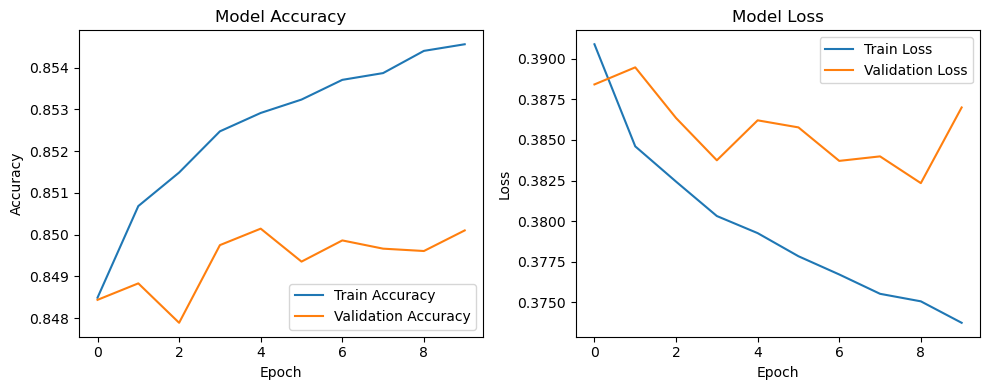

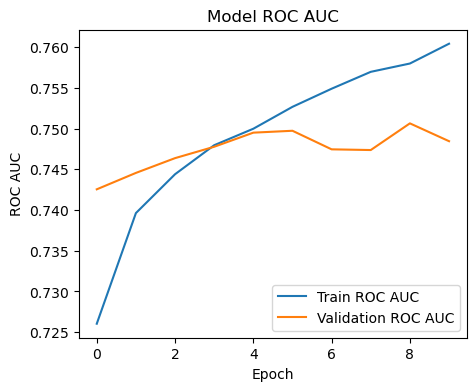

In [246]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Plot ROC AUC
plt.figure(figsize=(5, 4))
plt.plot(history.history['roc_auc'], label='Train ROC AUC')
plt.plot(history.history['val_roc_auc'], label='Validation ROC AUC')
plt.title('Model ROC AUC')
plt.xlabel('Epoch')
plt.ylabel('ROC AUC')
plt.legend(loc='lower right')
plt.show()


**Observation-**
- The divergence between training and validation metrics suggests that while the model is learning well, it may be too complex or too finely tuned to the training data, leading to suboptimal performance on the validation data. 
- To address this, we might consider implementing strategies such as BatchNormalization or dropout.

**Batch Normalization**

In [240]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Flatten

model_batch = Sequential()

# Add the Flatten layer only if your input data is multi-dimensional like images.
model.add(Flatten(input_shape=X_train_processed.shape[1:]))

# Add dense layers with BatchNormalization and LeakyReLU activation
for _ in range(10):
    model_batch.add(Dense(100))
    model_batch.add(BatchNormalization())  # Batch Normalization layer
    model_batch.add(LeakyReLU(alpha=0.2))

# Add the output layer with a single unit for binary classification
model_batch.add(Dense(1, activation='sigmoid'))

# Compile the model with binary_crossentropy loss for a binary classification problem
history_batch = model_batch.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy', tf.keras.metrics.AUC(curve='ROC', name='roc_auc')])



In [241]:
history_batch = model_batch.fit(X_train_processed, y_train, epochs = 10,
          validation_data=(X_valid_processed, y_valid))

Epoch 1/10
11087/11087 [==============================] - 26s 2ms/step - loss: 0.3982 - accuracy: 0.8451 - roc_auc: 0.7123 - val_loss: 0.4043 - val_accuracy: 0.8421 - val_roc_auc: 0.7413
Epoch 2/10
11087/11087 [==============================] - 24s 2ms/step - loss: 0.3887 - accuracy: 0.8479 - roc_auc: 0.7336 - val_loss: 0.4370 - val_accuracy: 0.8431 - val_roc_auc: 0.7400
Epoch 3/10
11087/11087 [==============================] - 24s 2ms/step - loss: 0.3859 - accuracy: 0.8488 - roc_auc: 0.7397 - val_loss: 0.4005 - val_accuracy: 0.8443 - val_roc_auc: 0.7398
Epoch 4/10
11087/11087 [==============================] - 24s 2ms/step - loss: 0.3845 - accuracy: 0.8496 - roc_auc: 0.7418 - val_loss: 0.4029 - val_accuracy: 0.8479 - val_roc_auc: 0.7444
Epoch 5/10
11087/11087 [==============================] - 24s 2ms/step - loss: 0.3831 - accuracy: 0.8503 - roc_auc: 0.7444 - val_loss: 0.4020 - val_accuracy: 0.8484 - val_roc_auc: 0.7461
Epoch 6/10
11087/11087 [==============================] - 25s 2ms

In [242]:
# Assuming X_test_processed and y_test are your preprocessed test features and labels
test_scores = model_batch.evaluate(X_test_processed, y_test)
print(f"Test Loss: {test_scores[0]}")
print(f"Test Accuracy: {test_scores[1]}")
print(f"Test ROC AUC: {test_scores[2]}")

3465/3465 [==============================] - 2s 582us/step - loss: 0.4313 - accuracy: 0.8473 - roc_auc: 0.7049
Test Loss: 0.43130865693092346
Test Accuracy: 0.8472723364830017
Test ROC AUC: 0.7049435377120972


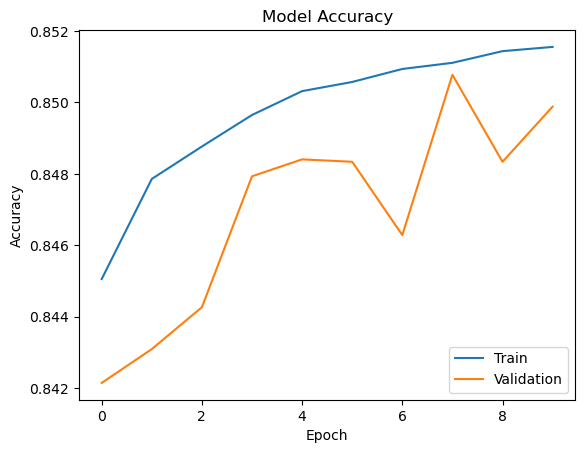

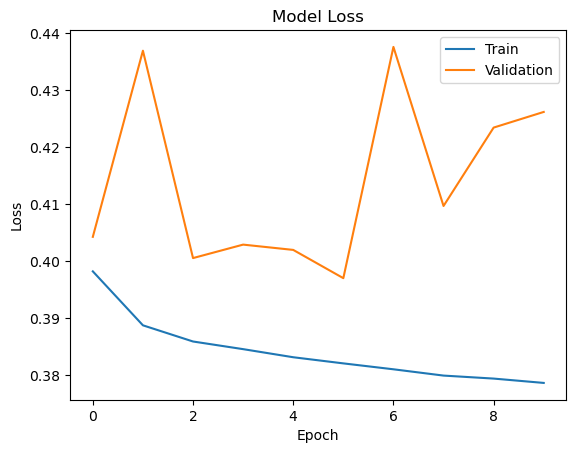

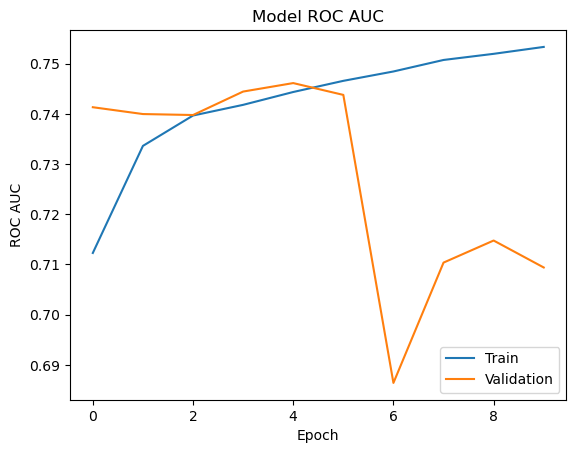

In [248]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history_batch.history['accuracy'])
plt.plot(history_batch.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Plot training & validation loss
plt.plot(history_batch.history['loss'])
plt.plot(history_batch.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation ROC AUC
plt.plot(history_batch.history['roc_auc'])
plt.plot(history_batch.history['val_roc_auc'])
plt.title('Model ROC AUC')
plt.ylabel('ROC AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


**Obervation-**
- The model demonstrates promising learning capability, as evidenced by the improvement in training loss and accuracy. 
- However, the variability observed in the validation metrics raises concerns about the model's generalization. Specifically, the fluctuating validation loss and accuracy, along with a decrease in validation ROC AUC after a peak, suggest that the model may be overfitting.

## Model Evaluation

Compare the best models' performance on the test data.

**Logistic Regression**

In [101]:
# Predictions
y_pred_lr = grid_search_log.predict(X_test)
y_proba_lr = grid_search_log.predict_proba(X_test)[:, 1] 

In [102]:
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix for Logistic Regression:\n", conf_matrix)

Confusion Matrix for Logistic Regression:
 [[ 1200 17006]
 [  507 92151]]


In [124]:
conf_matrix = confusion_matrix(y_test, y_pred_lr, normalize='true')
print("Confusion Matrix for Logistic Regression:\n", conf_matrix)

Confusion Matrix for Logistic Regression:
 [[0.06591234 0.93408766]
 [0.00547173 0.99452827]]


In [125]:
conf_matrix = confusion_matrix(y_test, y_pred_lr, normalize='pred')
print("Confusion Matrix for Logistic Regression:\n", conf_matrix)

Confusion Matrix for Logistic Regression:
 [[0.7029877  0.15579395]
 [0.2970123  0.84420605]]


In [103]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy Score:", accuracy_lr)

Accuracy Score: 0.8420316784528792


In [104]:
precision_lr = precision_score(y_test, y_pred_lr)
print("Precision Score:", precision_lr)

Precision Score: 0.8442060518335974


In [105]:
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)

# Print the ROC AUC Score
print(f"ROC AUC score for Logistic Regression: {roc_auc_lr}")

ROC AUC score for Logistic Regression: 0.6812210301967747


In [106]:
f1_lr = f1_score(y_test, y_pred_lr)
print(f"F1 score for Logistic Regression: {roc_auc_lr}")

F1 score for Logistic Regression: 0.6812210301967747


In [107]:
recall_lr = recall_score(y_test, y_pred_lr)
print("Recall Score:", recall_lr)

Recall Score: 0.9945282652334391


In [108]:
class_report = classification_report(y_test, y_pred_lr,target_names=['Not Recommended', 'Recommended'])
print("Classification Report:\n", class_report)

Classification Report:
                  precision    recall  f1-score   support

Not Recommended       0.70      0.07      0.12     18206
    Recommended       0.84      0.99      0.91     92658

       accuracy                           0.84    110864
      macro avg       0.77      0.53      0.52    110864
   weighted avg       0.82      0.84      0.78    110864



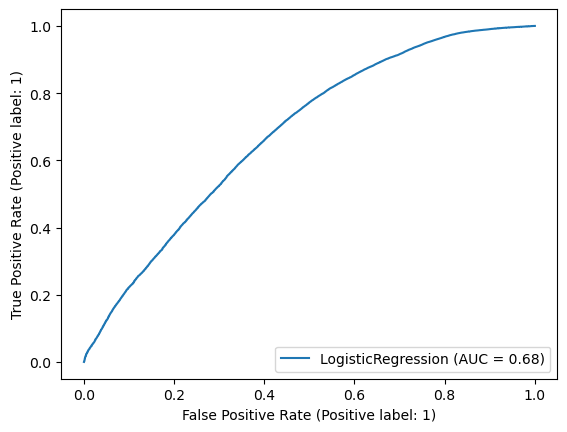

In [109]:
RocCurveDisplay.from_predictions(y_test, y_proba_lr, name="LogisticRegression")

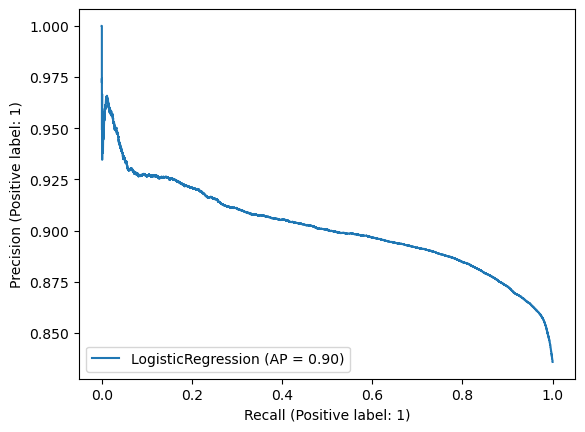

In [110]:
PrecisionRecallDisplay.from_predictions(y_test, y_proba_lr, name="LogisticRegression")

**Random Forest**

In [149]:
# Make predictions
y_pred_RF = grid_search_RF.predict(X_test)
# Predict probabilities for the positive class
y_pred_proba_RF = grid_search_RF.predict_proba(X_test)[:, 1]

In [150]:
conf_matrix_RF = confusion_matrix(y_test, y_pred_RF)
print("Confusion Matrix for Random Forest with best hyperparametes:\n", conf_matrix_RF)

Confusion Matrix for Random Forest with best hyperparametes:
 [[ 3192 15014]
 [ 1342 91316]]


In [151]:
accuracy_RF = accuracy_score(y_test, y_pred_RF)
print("Accuracy Score for Random Forest:", accuracy_RF)

Accuracy Score for Random Forest: 0.8524678885842113


In [152]:
precision_RF = precision_score(y_test, y_pred_RF)
print("Precision Score for Random Forest:", precision_RF)

Precision Score for Random Forest: 0.8587980814445594


In [153]:
roc_auc_RF = roc_auc_score(y_test, y_pred_proba_RF)

# Print the ROC AUC Score
print(f"ROC AUC score for Random Forest: {roc_auc_RF}")

ROC AUC score for Random Forest: 0.7678073153208942


In [154]:
recall_RF = recall_score(y_test, y_pred_RF)
print("Recall Score:", recall_RF)

Recall Score: 0.985516631051825


In [155]:
f1_RF = f1_score(y_test, y_pred_RF)

In [156]:
class_report_RF = classification_report(y_test, y_pred_RF,target_names=['Not Recommended', 'Recommended'])
print("Classification Report for Random Forest:\n", class_report_RF)

Classification Report for Random Forest:
                  precision    recall  f1-score   support

Not Recommended       0.70      0.18      0.28     18206
    Recommended       0.86      0.99      0.92     92658

       accuracy                           0.85    110864
      macro avg       0.78      0.58      0.60    110864
   weighted avg       0.83      0.85      0.81    110864



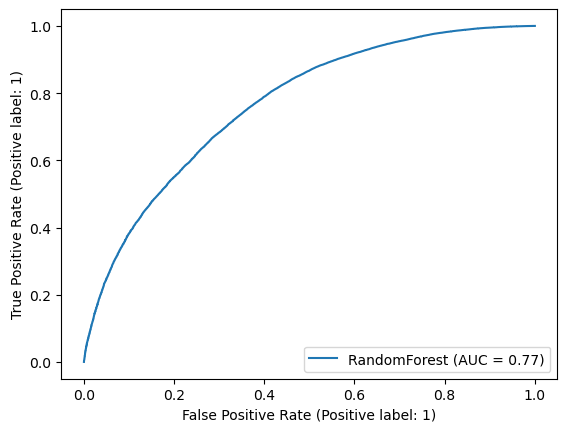

In [157]:
RocCurveDisplay.from_predictions(y_test, y_pred_proba_RF, name="RandomForest")

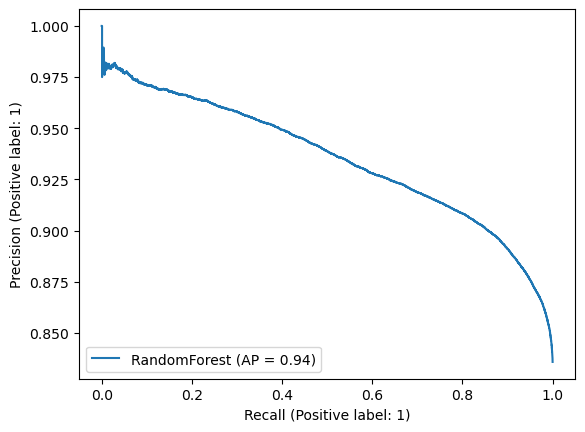

In [158]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_RF, name="RandomForest")

**Gradient Boosting**

In [159]:
# Make predictions
y_pred_GB = grid_search_GB.predict(X_test)
# Predict probabilities for the positive class
y_pred_proba_GB = grid_search_GB.predict_proba(X_test)[:, 1]

In [160]:
accuracy_GB = accuracy_score(y_test, y_pred_GB)
print("Accuracy Score:", accuracy_GB)

Accuracy Score: 0.8477864771251262


In [161]:
precision_GB = precision_score(y_test, y_pred_GB)
print("Precision Score:", precision_GB)

Precision Score: 0.8578214268851221


In [162]:
recall_GB = recall_score(y_test, y_pred_GB)
print("Recall Score:", recall_GB)

Recall Score: 0.9803686675732263


In [163]:
f1_GB = f1_score(y_test, y_pred_GB)
print("F1 Score:", f1_GB)

F1 Score: 0.9150100980594602


In [164]:
roc_auc_GB = roc_auc_score(y_test, y_pred_proba_GB)

# Print the ROC AUC Score
print(f"ROC AUC score for Gradient Boosting: {roc_auc_GB}")

ROC AUC score for Gradient Boosting: 0.7353001385685152


In [165]:
# Confusion Matrix
conf_matrix_GB = confusion_matrix(y_test, y_pred_GB)
print("Confusion Matrix for Gradient Boosting:\n", conf_matrix_GB)

Confusion Matrix for Gradient Boosting:
 [[ 3150 15056]
 [ 1819 90839]]


In [166]:
class_report_GB = classification_report(y_test, y_pred_GB,target_names=['Not Recommended', 'Recommended'])
print("Classification Report:\n", class_report_GB)

Classification Report:
                  precision    recall  f1-score   support

Not Recommended       0.63      0.17      0.27     18206
    Recommended       0.86      0.98      0.92     92658

       accuracy                           0.85    110864
      macro avg       0.75      0.58      0.59    110864
   weighted avg       0.82      0.85      0.81    110864



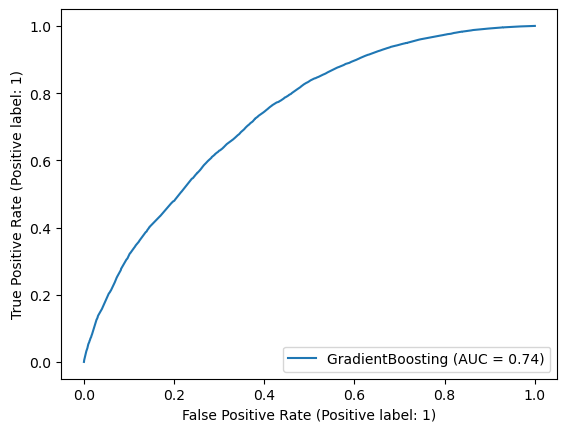

In [167]:
RocCurveDisplay.from_predictions(y_test, y_pred_proba_GB, name="GradientBoosting")


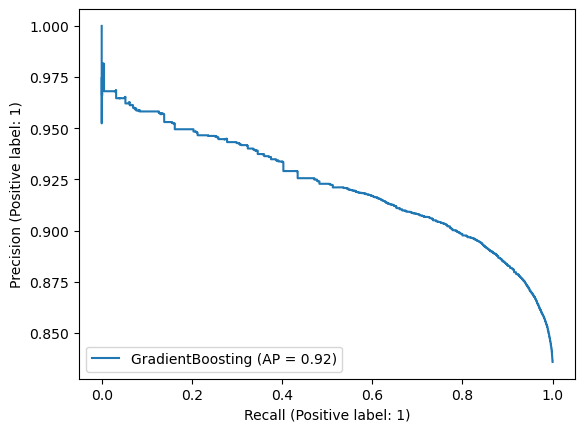

In [168]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_GB, name="GradientBoosting")

**XGBoost**

In [169]:
y_pred_xgb = grid_search_xgb.predict(X_test)
y_pred_proba_xgb = grid_search_xgb.predict_proba(X_test)[:, 1]

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix for XGBoost:\n", conf_matrix_xgb)

Confusion Matrix for XGBoost:
 [[ 3729 14477]
 [ 1910 90748]]


In [170]:
# Accuracy Score
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy Score:", accuracy_xgb)

Accuracy Score: 0.8521882667051522


In [171]:
# Precision Score
precision_xgb = precision_score(y_test, y_pred_xgb)
print("Precision Score:", precision_xgb)

Precision Score: 0.8624186267521977


In [172]:
# Recall Score
recall_xgb = recall_score(y_test, y_pred_xgb)
print("Recall Score:", recall_xgb)

Recall Score: 0.9793865613330743


In [173]:
# F1 Score
f1_xgb = f1_score(y_test, y_pred_xgb)
print("F1 Score:", f1_xgb)

F1 Score: 0.9171884396335207


In [174]:
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

# Print the ROC AUC Score
print(f"ROC AUC score for XGBoost: {roc_auc_xgb}")

ROC AUC score for XGBoost: 0.7736361291880944


In [175]:
# Classification Report
class_report_xgb = classification_report(y_test, y_pred_xgb,target_names=['Not Recommended', 'Recommended'])
print("Classification Report:\n", class_report_xgb)

Classification Report:
                  precision    recall  f1-score   support

Not Recommended       0.66      0.20      0.31     18206
    Recommended       0.86      0.98      0.92     92658

       accuracy                           0.85    110864
      macro avg       0.76      0.59      0.61    110864
   weighted avg       0.83      0.85      0.82    110864



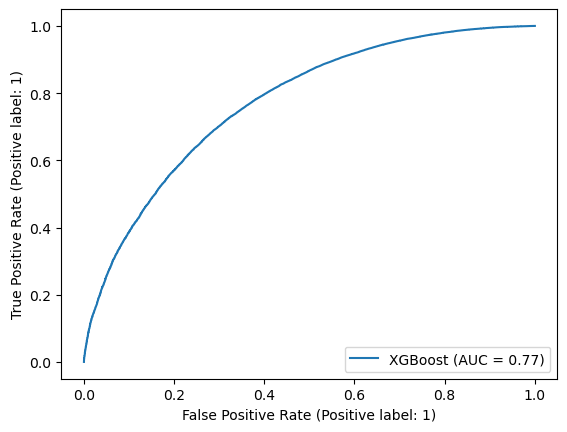

In [176]:
# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_pred_proba_xgb, name="XGBoost")

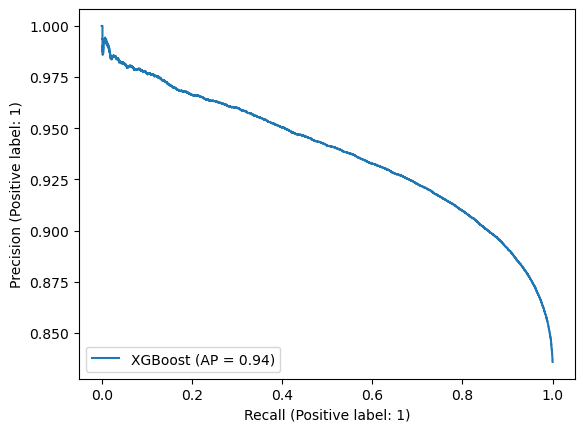

In [177]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_xgb, name="XGBoost")

## Comparative Analysis of Model for Product Recommendation Classification

The analysis for model evaluation includes ensemble methods, a logistic regression model, and a neural network, each evaluated across various performance metrics.

In [178]:
import matplotlib.pyplot as plt
import numpy as np

# Organizing model scores in dictionaries
lr_scores = {'Accuracy': accuracy_lr, 'ROC AUC': roc_auc_lr, 'Precision': precision_lr, 'Recall': recall_lr, 'F1': f1_lr}
GB_scores = {'Accuracy': accuracy_GB, 'ROC AUC': roc_auc_GB, 'Precision': precision_GB, 'Recall': recall_GB, 'F1': f1_GB}
RF_scores = {'Accuracy': accuracy_RF, 'ROC AUC': roc_auc_RF, 'Precision': precision_RF, 'Recall': recall_RF, 'F1': f1_RF}
xgb_scores = {'Accuracy': accuracy_xgb, 'ROC AUC': roc_auc_xgb, 'Precision': precision_xgb, 'Recall': recall_xgb, 'F1': f1_xgb}

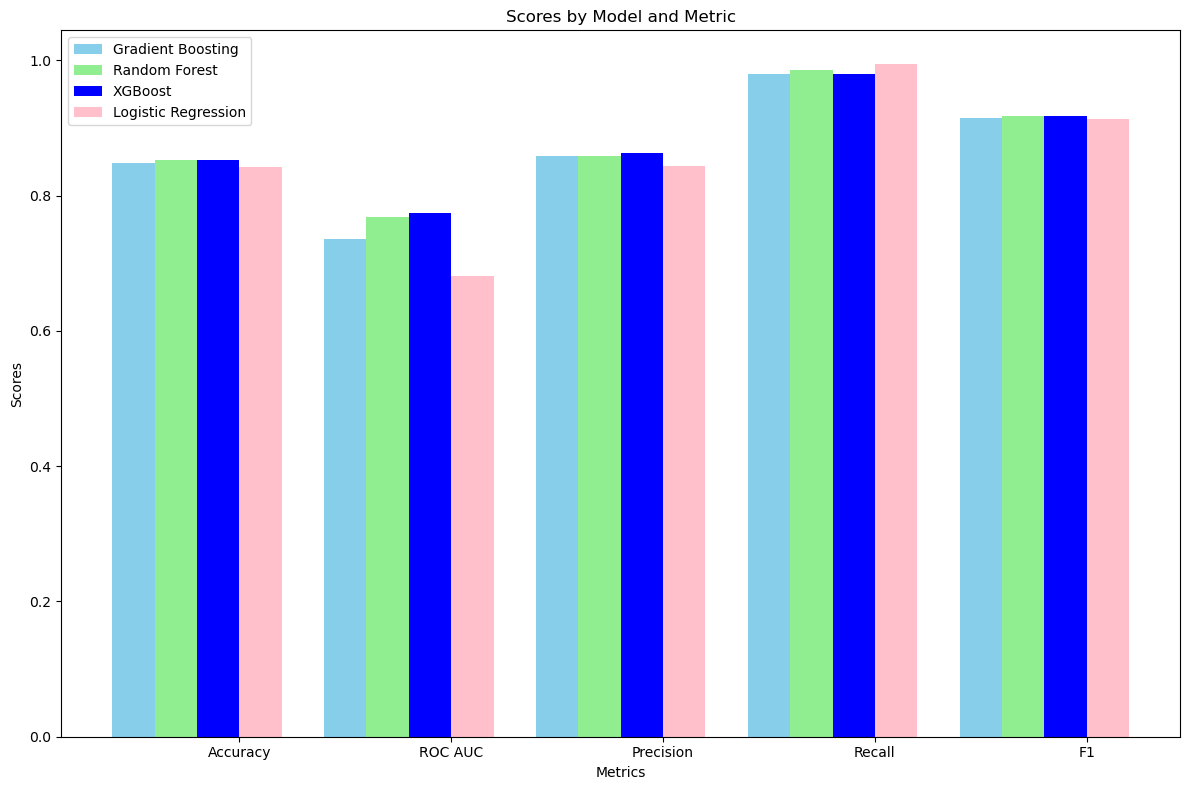

In [179]:
metric_names = list(GB_scores.keys())

# Preparing scores_data including Logistic Regression
scores_data = np.array([
    [GB_scores[metric], RF_scores[metric], xgb_scores[metric], lr_scores[metric]] 
    for metric in metric_names
])

# Plotting setup with a larger figure size
fig, ax = plt.subplots(figsize=(12, 8))  # Increased figure size
index = np.arange(len(metric_names))
bar_width = 0.2  # Adjusted bar width for four models

# Defining colors for each model for better distinction
colors = ['skyblue', 'lightgreen', 'blue', 'pink'] 

# Plotting each metric for each model
bars = []
for i, (model_scores, color) in enumerate(zip(scores_data.T, colors)):
    bars.append(ax.bar(index + i*bar_width - 1.5*bar_width, model_scores, bar_width, label=['Gradient Boosting', 'Random Forest', 'XGBoost', 'Logistic Regression'][i], color=color))

# Setting the axes, title, and customizing the legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Scores by Model and Metric')
ax.set_xticks(index - bar_width / 2 + 1.5*bar_width)
ax.set_xticklabels(metric_names)
ax.legend()

plt.tight_layout()
plt.show()

#### Ensemble Methods and Logistic Regression Comparison:

- Gradient Boosting and Random Forest show competitive performance across all metrics. XGBoost slightly edges out in Precision, Recall, and F1 Score, which are critical for a balanced assessment of model performance in classification tasks.
- The high ROC AUC values for ensemble models indicate a strong capability to distinguish between the classes of 'recommended' and 'not recommended'.
- Precision and Recall balance is vital as it reflects the model's ability to correctly label recommended products (Precision) and its sensitivity to identifying all relevant cases of recommendations (Recall).
- The F1 Score, which is the harmonic mean of Precision and Recall, suggests that XGBoost maintains a favorable balance between the two, making it an excellent candidate for the recommendation classification.

#### Neural Network Performance:

- The neural network displays a consistent improvement in training accuracy, but validation accuracy fluctuates, suggesting potential overfitting issues.
- The training loss diminishes over epochs, while the validation loss presents variability, further indicating overfitting.



## Conclusion - XGBoost works best for our use-case

Taking into account both traditional machine learning models and a neural network approach, the ensemble methods, particularly **XGBoost**, demonstrate robustness across all metrics, suggesting that they are well-suited for the recommendation classification task. In contrast, the neural network shows potential but may require further tuning to address overfitting and improve its stability on unseen data.

**XGBoost:**
- With its superior Precision, Recall, and F1 Score, is the chosen model for deployment in the product recommendation system. 
- Its strong performance suggests it can accurately classify products as recommended or not, which is crucial for providing reliable recommendations to users. 

As a result,XGBoost is recommended, with the suggestion to further investigate neural network architectures and regularization techniques for future model iterations.

### Next Steps

As we move forward, implementing **clustering algorithms(K-means / DBSCAN)**
- Could unveil intrinsic groupings within our data, potentially uncovering hidden patterns in customer preferences and product features. 
- This approach may aid in segmenting products and customers more effectively, allowing for targeted marketing and personalized recommendation strategies that could further refine our system's accuracy and user satisfaction.